In [25]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Read the dataset
df_PE = pd.read_csv('PEA11.20231027T221019.csv')
df_PE.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [27]:
#Shape of dataset
df_PE.shape

(11817, 6)

In [28]:
#Sattistical description of dataset
df_PE.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


In [29]:
#Total population
total_population = df_PE[df_PE["Single Year of Age"] == "All ages"]["VALUE"].sum()
print("Total population in 1926:", total_population)

Total population in 1926: 316250186


In [30]:
# Male and Female populations
male_population = df_PE[(df_PE["Single Year of Age"] == "All ages") & (df_PE["Sex"] == "Male")]["VALUE"].values[0]
female_population = df_PE[(df_PE["Single Year of Age"] == "All ages") & (df_PE["Sex"] == "Female")]["VALUE"].values[0]
print("Male population in 1926:", male_population)
print("Female population in 1926:", female_population)

Male population in 1926: 1506889
Female population in 1926: 1465103


In [31]:
# Population under 1 year
under_1_year_population = df_PE[df_PE["Single Year of Age"] == "Under 1 year"]["VALUE"].sum()
print("Population under 1 year in 1926:", under_1_year_population)

Population under 1 year in 1926: 4817598


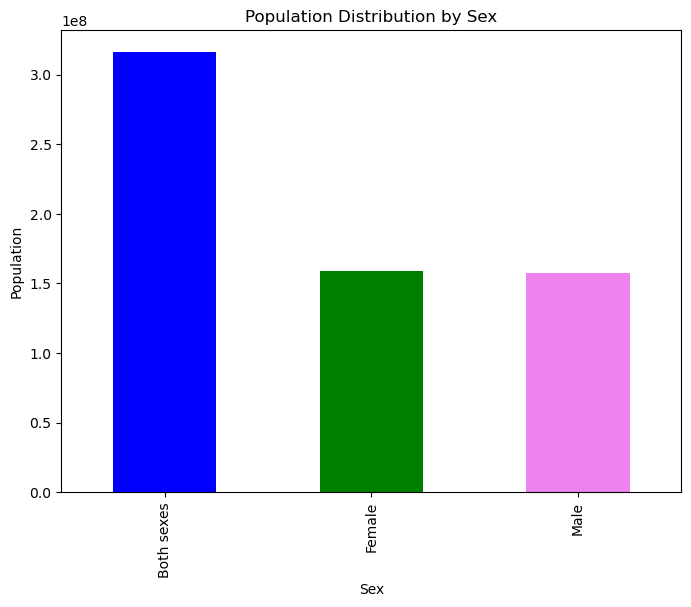

In [32]:
# Visualize the distribution of population by sex
plt.figure(figsize=(8, 6))
df_PE.groupby('Sex')['VALUE'].sum().plot(kind='bar', color=['blue', 'green','violet'])
plt.title("Population Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Population")
plt.show()

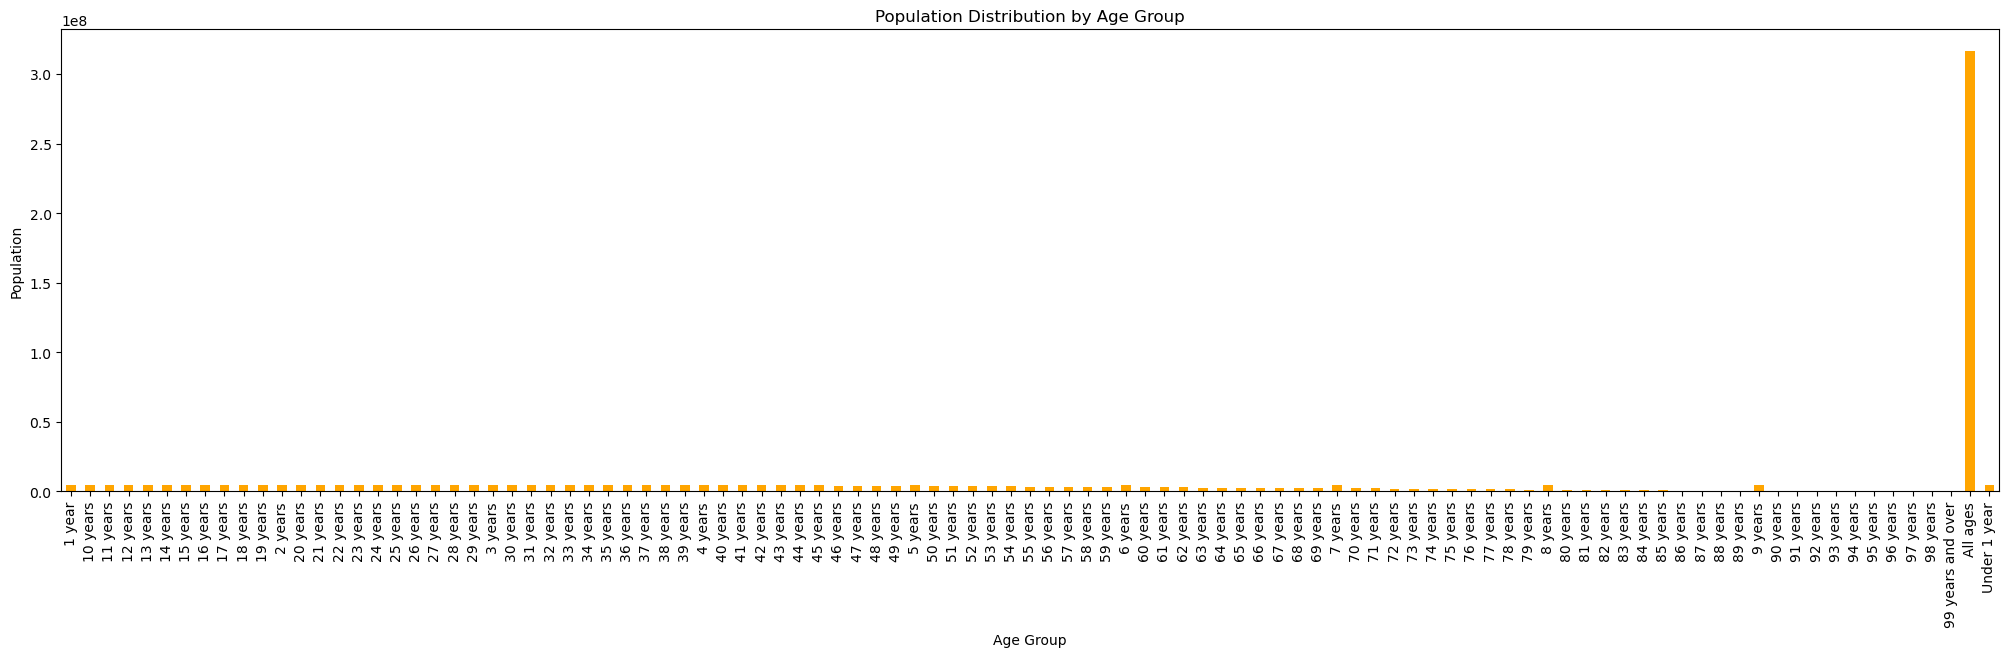

In [33]:
# Visualize the distribution of population by age group
plt.figure(figsize=(25, 6))
df_PE.groupby('Single Year of Age')['VALUE'].sum().plot(kind='bar', color='orange')
plt.title("Population Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Population")
plt.show()

In [34]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_PE, columns=["STATISTIC Label", "Single Year of Age", "Sex", "UNIT"])

In [35]:
# Separating the feature and target variable
X = df_encoded.drop("VALUE", axis=1)
y = df_encoded["VALUE"]

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [37]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)




In [40]:
# Evaluate the Model
mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)
print("Linear Regression Mean Squared Error:", mse)
print("Linear Regression R-squared:", r2)

Linear Regression Mean Squared Error: 11352741095.500847
Linear Regression R-squared: 0.8587042786943769
